In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
import cv2
from pathlib import Path
path1 = Path('/content/drive/MyDrive/face/')
classnames = []
for path in Path(path1).iterdir():
    if path.is_dir():
        classnames.append(str(path).split('/')[-1])
print(classnames)

['Phuc', 'Hoang', 'Tan', 'Tanh', 'phi', 'Nguyen', 'Han', 'Thuong', 'Thoai', 'LamVu']


In [4]:
X = []
y = []
for i in range(len(classnames)):
  print(classnames[i])
  images = list(Path('/content/drive/MyDrive/face/'+classnames[i]).glob('*'))
  for image in range(int(0.4*len(images))):
    img = cv2.imread(str(images[image]))
    img = cv2.resize(img, (64, 64))
    img = img.astype('float32')
    img = img/255
    X.append(img)
    y.append(i)

Phuc
Hoang
Tan
Tanh
phi
Nguyen
Han
Thuong
Thoai
LamVu


In [5]:
from keras.utils import to_categorical
y = to_categorical(y)

In [6]:
print(y.shape)
print(np.array(X).shape)

(427, 10)
(427, 64, 64, 3)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2)

In [8]:
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add((Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(64,64,3), padding='same')))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Flatten())
model.add(Dense(128, activation= 'relu'))
model.add(Dense(10, activation= 'softmax'))

In [9]:
from keras.optimizers import Adam
import keras
model.compile(optimizer= Adam(), loss = keras.losses.categorical_crossentropy, metrics= ['accuracy'])

In [10]:
history = model.fit(X_train, y_train, batch_size= 128 , epochs= 20 , verbose= 2)

Epoch 1/20
3/3 - 9s - loss: 2.1045 - accuracy: 0.3079 - 9s/epoch - 3s/step
Epoch 2/20
3/3 - 0s - loss: 1.3114 - accuracy: 0.6012 - 44ms/epoch - 15ms/step
Epoch 3/20
3/3 - 0s - loss: 0.7563 - accuracy: 0.8680 - 43ms/epoch - 14ms/step
Epoch 4/20
3/3 - 0s - loss: 0.3362 - accuracy: 0.9413 - 44ms/epoch - 15ms/step
Epoch 5/20
3/3 - 0s - loss: 0.1196 - accuracy: 0.9883 - 42ms/epoch - 14ms/step
Epoch 6/20
3/3 - 0s - loss: 0.0358 - accuracy: 1.0000 - 42ms/epoch - 14ms/step
Epoch 7/20
3/3 - 0s - loss: 0.0146 - accuracy: 1.0000 - 43ms/epoch - 14ms/step
Epoch 8/20
3/3 - 0s - loss: 0.0055 - accuracy: 1.0000 - 46ms/epoch - 15ms/step
Epoch 9/20
3/3 - 0s - loss: 0.0019 - accuracy: 1.0000 - 49ms/epoch - 16ms/step
Epoch 10/20
3/3 - 0s - loss: 8.2846e-04 - accuracy: 1.0000 - 44ms/epoch - 15ms/step
Epoch 11/20
3/3 - 0s - loss: 6.2835e-04 - accuracy: 1.0000 - 50ms/epoch - 17ms/step
Epoch 12/20
3/3 - 0s - loss: 3.8835e-04 - accuracy: 1.0000 - 43ms/epoch - 14ms/step
Epoch 13/20
3/3 - 0s - loss: 2.3261e-04 -

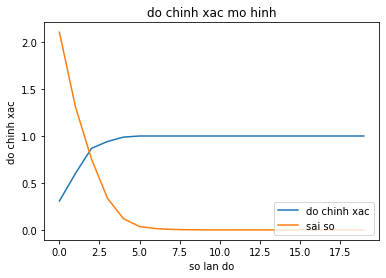

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('do chinh xac mo hinh')
plt.ylabel('do chinh xac')
plt.xlabel('so lan do')
plt.legend(['do chinh xac','sai so'], loc = 'lower right')

In [11]:
#evaluating the model for testing data..
test_loss,test_acc=model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 34ms/step - loss: 1.4930e-04 - accuracy: 1.0000


(64, 64, 3)
1/1 [==============================] - 0s 21ms/step
Nguyen
Nguyen


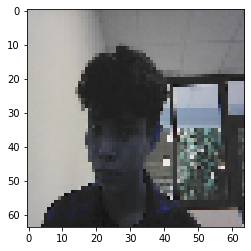

In [18]:
n = 6
print(X_test[n].shape)
plt.imshow(X_test[n])
pred = model.predict(X_test[n].reshape((1, 64, 64, 3)))
print(classnames[pred.argmax()])
print(classnames[y_test[n].argmax()])